# Uczenie maszynowe - laboratorium 0


In [3]:
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo
from typing import NamedTuple, List, Dict, Any


# Type definitions to fix this library from:
# https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file#parameters
class UciMlData(NamedTuple):
    ids: DataFrame
    features: DataFrame
    targets: DataFrame
    original: DataFrame
    headers: List[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: Dict[str, Any]
    variables: DataFrame

## Iris dataset


In [4]:
iris: UciMlDataset = fetch_ucirepo(id=53)
iris.data.features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.data.targets.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### Zależność szerokości płatków Iris od klasy


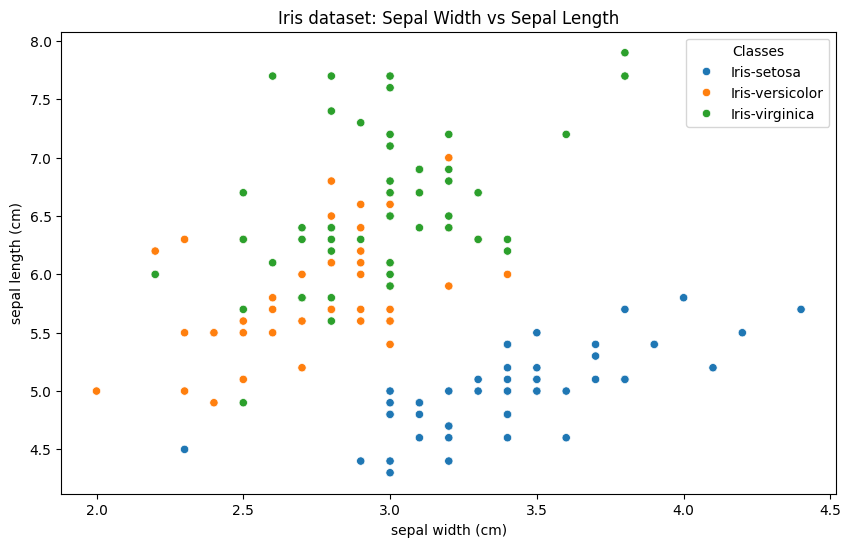

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

iris: UciMlDataset = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=X["sepal width"], y=X["sepal length"], hue=y["class"])
plt.title("Iris: Sepal Width vs Sepal Length")
plt.legend(title="Classes")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.show()

Opis zbioru danych

- zbiór zawiera 150 próbek od 3 gatunków irysów (po 50 każdy):
- każda próbka (z `features`) zawiera cztery atrybuty:
  - sepal length \[cm\] (długość działki kielicha)
  - sepal width \[cm\] (szerokość diałki kielicha)
  - petal length \[cm\] (długość płatka)
  - petal width \[cm\] (szerokość płatka)
- 2 tabela (`targets`): informacje o gatunku (3 klasy)

Analizując zależność szerokości działki kielicha od klasy:

- jedna z klas (setosa) liniowo separowalna od dwóch pozostałych (virginica, versicolor)
- dwie pozostałe nie separowalne


### Pair Grid Chart (zależność długości i szerokości płatka (sepal))


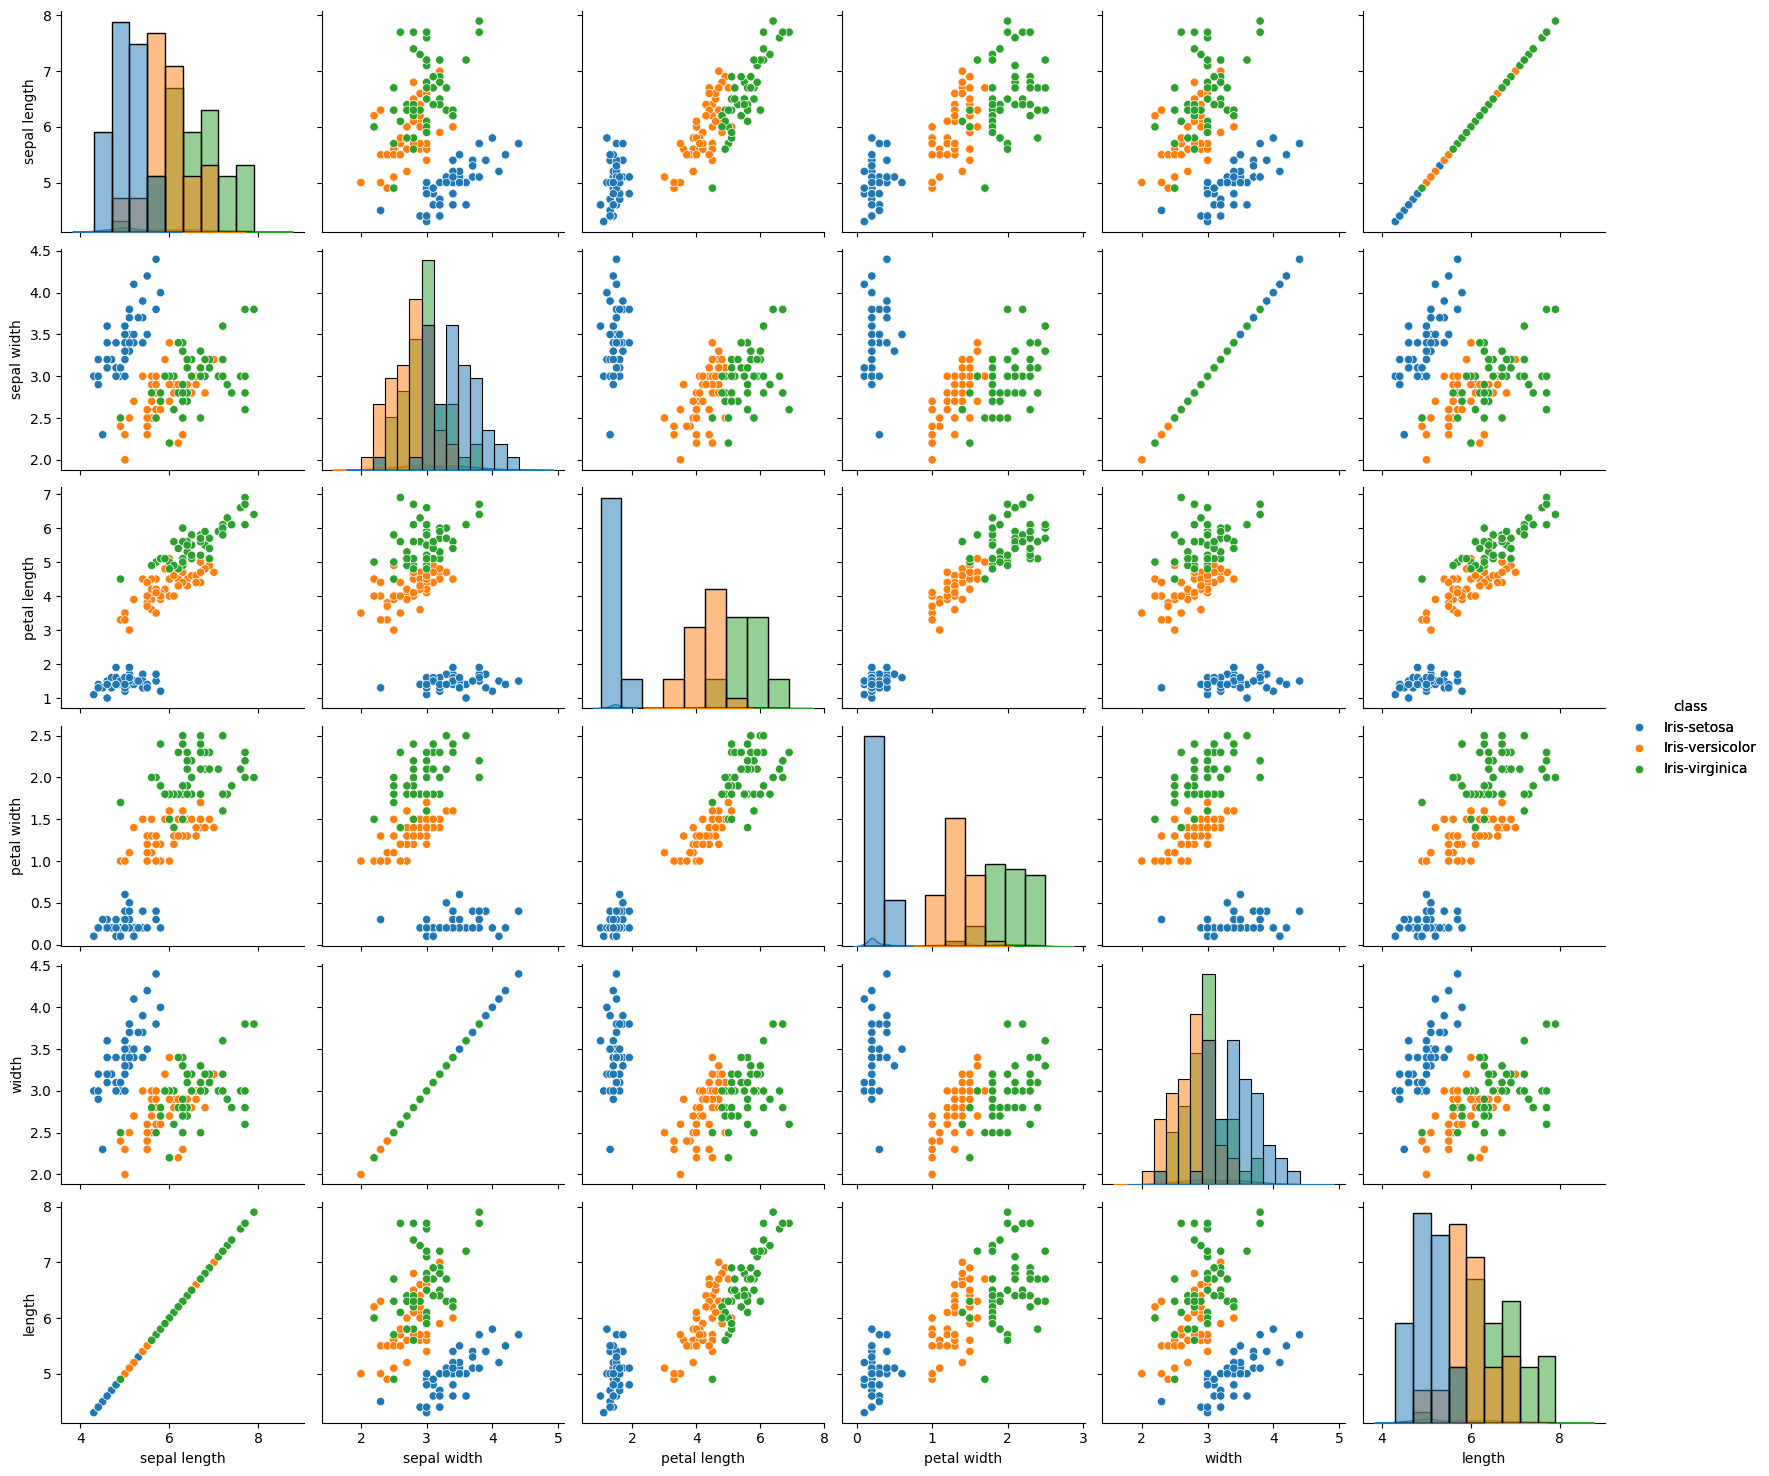

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

iris: UciMlDataset = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

X["length"] = X["sepal length"]
X["width"] = X["sepal width"]

iris_df = X.join(y)

g = sns.pairplot(
    iris_df,
    hue="class",
    vars=[
        "sepal length",
        "sepal width",
        "petal length",
        "petal width",
        "width",
        "length",
    ],
)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

plt.show()

- szybka ocena jakie zmienne są ze sobą powiązane
- na przekątnej dystrybucję pojedynczej zmiennej


### PCA Iris


(150, 3)


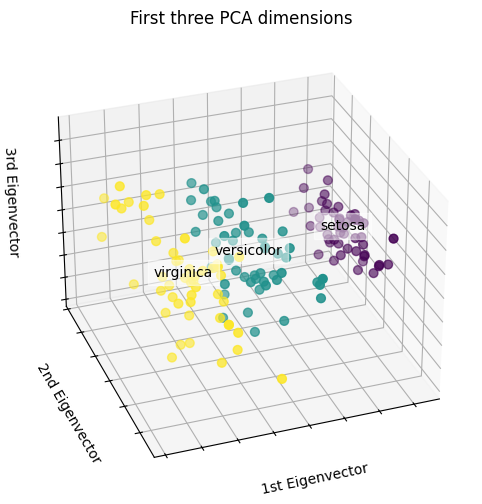

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

iris: UciMlDataset = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

# convert target names to numerical values
le = LabelEncoder()
y_numeric = le.fit_transform(y["class"])


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Reduce the data to 3 dimensions
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_numeric,
    s=40,
)

print(X_reduced.shape)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

# Create a legend:
species_names = ["setosa", "versicolor", "virginica"]
for i, species in enumerate(species_names):
    ax.text3D(
        X_reduced[y_numeric == i, 0].mean(),
        X_reduced[y_numeric == i, 1].mean(),
        X_reduced[y_numeric == i, 2].mean(),
        species,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

plt.show()

PCA

- polega na obliczeniu wektorów własnych, które wskazują kierunki, wzdłuż któryhch dane mają największą wariancję (Eigevectors)


## Glass dataset


In [5]:
glass: UciMlDataset = fetch_ucirepo(id=42)
glass.data.features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
glass.data.targets.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


Opis zbioru Glass identification:

- dane próbek: skład chemiczny szkła (9 atrybutów)
  - RI (refractive index) - indeks refrakcji
  - Na - procentowa ilość Na
  - Al - procentowa ilość Mg
  - ...
- tablica klasy: rodzaj szkła - liczba <1-7> (7 klas)


### Pair Grid Chart


/tmp/ipykernel_55381/3908106774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RI 2"] = X["RI"]


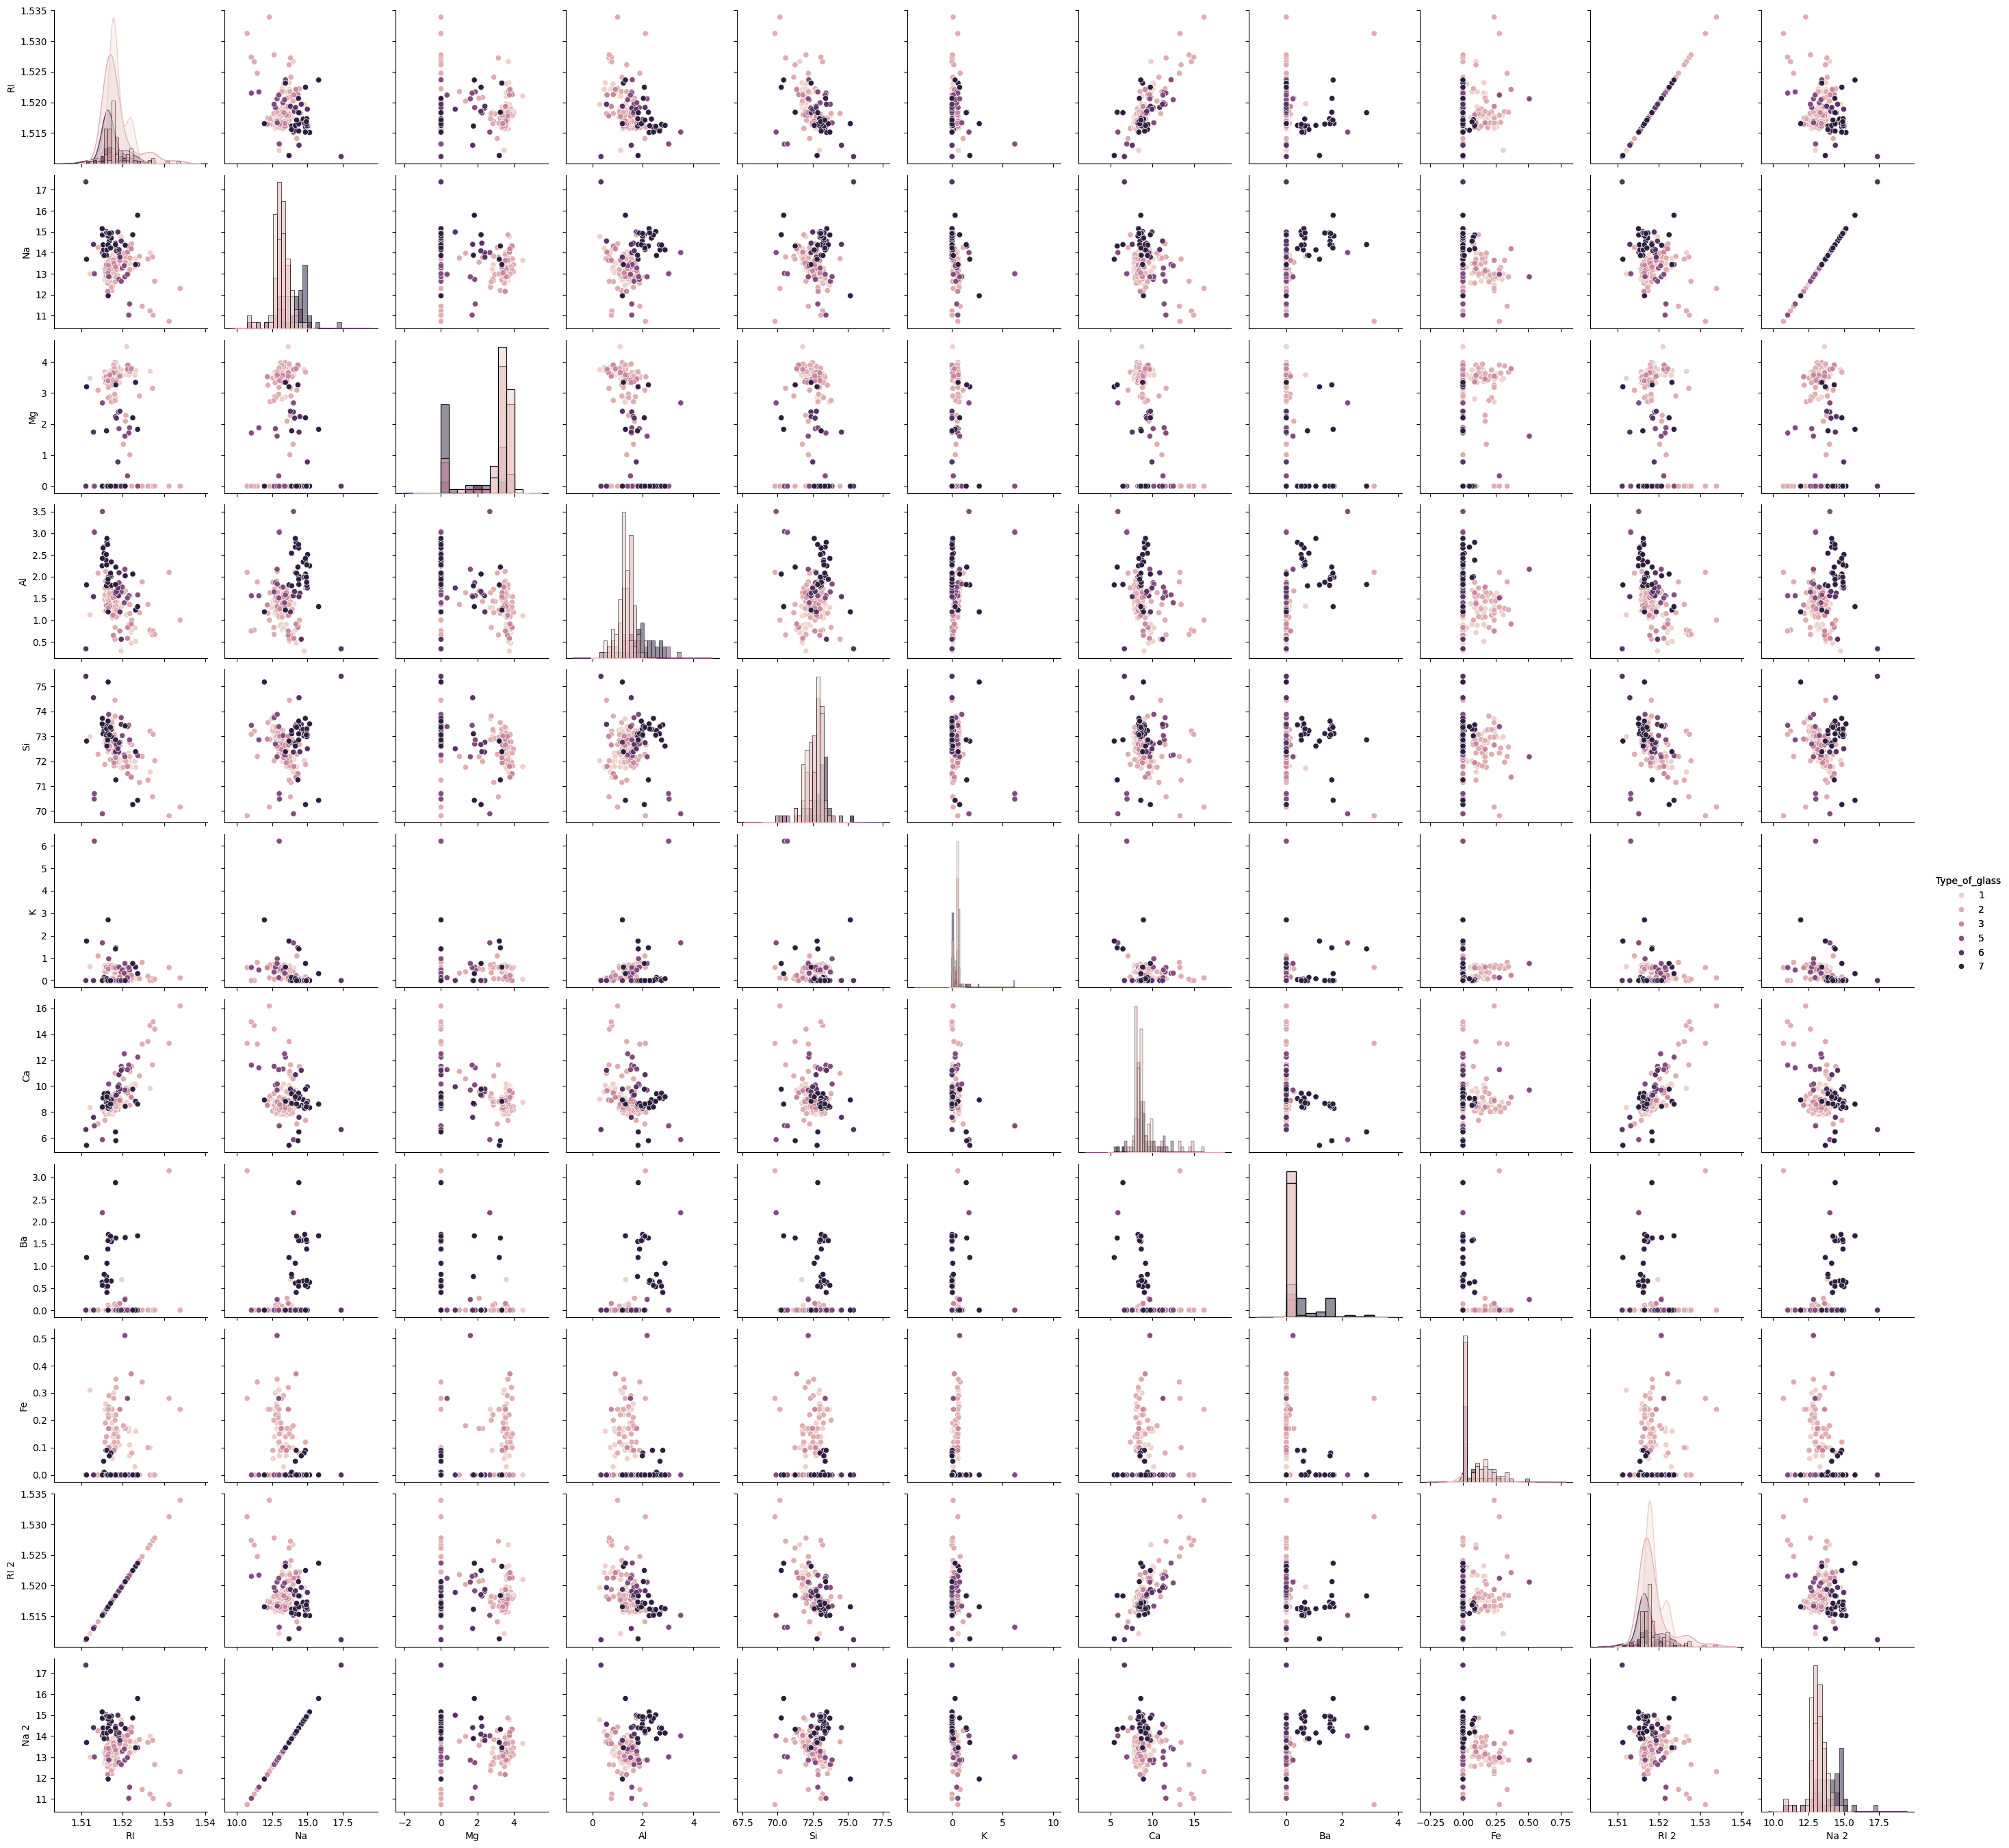

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

glass: UciMlDataset = fetch_ucirepo(id=42)

X = glass.data.features
y = glass.data.targets


X["RI 2"] = X["RI"]
X["Na 2"] = X["Na"]

glass_df = X.join(y)

g = sns.pairplot(
    glass_df,
    hue="Type_of_glass",
)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

plt.show()

### PCA Glass


(214, 3)


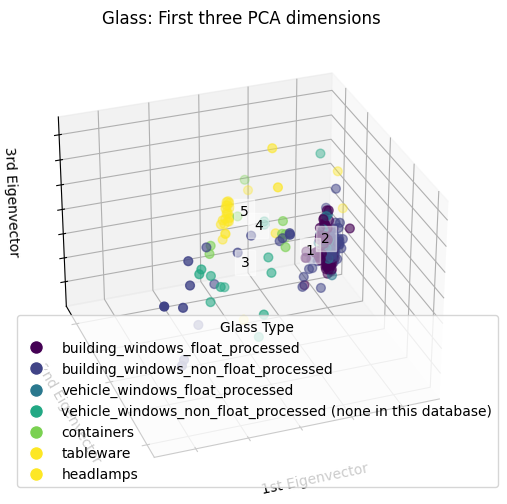

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo

glass: UciMlDataset = fetch_ucirepo(id=42)

X = glass.data.features
y = glass.data.targets


# convert target names to numerical values
le = LabelEncoder()
y_numeric = le.fit_transform(y["Type_of_glass"])


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Reduce the data to 3 dimensions
X_reduced = PCA(n_components=3).fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_numeric,
    s=40,
)

print(X_reduced.shape)

ax.set_title("Glass: First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

for i in range(1, 8):
    mask = y_numeric == i
    if np.any(mask):
        ax.text3D(
            X_reduced[y_numeric == i, 0].mean(),
            X_reduced[y_numeric == i, 1].mean(),
            X_reduced[y_numeric == i, 2].mean(),
            i,
            horizontalalignment="center",
            bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
        )

# legend
glass_type_names = [
    "building_windows_float_processed",
    "building_windows_non_float_processed",
    "vehicle_windows_float_processed",
    "vehicle_windows_non_float_processed (none in this database)",
    "containers",
    "tableware",
    "headlamps",
]

# Create a legend mapping numeric labels to glass type names
handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=glass_type_names[i],
        markerfacecolor=scatter.cmap(scatter.norm(i)),
        markersize=10,
    )
    for i in range(len(glass_type_names))
]
ax.legend(handles=handles, title="Glass Type")


plt.show()

## Wine dataset


In [12]:
wine: UciMlDataset = fetch_ucirepo(id=109)
wine.data.features.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
wine.data.targets.head()

,class
0,1
1,1
2,1
3,1
4,1
